<h1 style = "text-align:center" > Exploration des données </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("train.csv",index_col=0)
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


>Caractéristiques du dataset : 
    > * 7905 lignes et 19 colonnes
    > * 12 colonnes numériques et 7 textes
    > * pas de valeurs manquantes
    > * la target présente 3 labels (D, C et CL) avec une répartition C:0.628//D:0.337//CL:0.034
    
    
    

## Un peu de contexte : 


>* Ascites : L'ascite est l'accumulation de liquide contenant des protéines dans l'abdomen.
>
>* Hepatomegaly : L'hépatomégalie (repérable à la palpation chez l'homme) est une hypertrophie du foie c'est-à-dire une augmentation du volume du foie, palpable sous le rebord costal droit.
>
>* Spiders : L'angiome stellaire est une lésion vasculaire bénigne de la peau ayant la forme d'un point central 
qui se ramifie par de nombreuses petites branches capillaires, comme une étoile (d'où le nom).
>
>* Edema : Un œdème est un gonflement d'un organe ou d'un tissu dû à une accumulation ou un excès intratissulaire de liquides
>
>* Bilirubin :La bilirubine est un pigment jaune, produit de dégradation de l'hémoglobine (lors de la destruction des globules rouges) mais aussi d'autres hémoprotéines (cytochromes, catalases...). Son catabolisme est assuré par le foie.
>
>* Cholesterol: Le cholestérol est un type de lipide (gras) fabriqué par le foie et présent dans les aliments que l'on consomme.
>
>* Albumin :L'albumine est la principale protéine de transport dans le sang. Elle transporte des substances de petite taille qui, seules, seraient éliminées par les reins, dont des hormones (en particulier les hormones liposolubles), la bilirubine, le calcium ou encore des acides gras.
>
>* Copper : cuivre
>
>
>* Alk_Phos : phosphatases alcalines. Une augmentation de l'activité PAL sérique est observée au cours de toutes les maladies du foie
>
>* SGOT : L'aspartate aminotransférase (ASAT ou SGOT) est une enzyme présente dans plusieurs tissus, en particulier dans le foie et les muscles, incluant le muscle cardiaque. Son dosage est surtout indiqué pour le diagnostic et le suivi des maladies du foie. Un niveau bas d'ASAT n'a aucune signification clinique.
>
>* Tryglicerides : Le cholestérol et les triglycérides sont des lipides nécessaires à l'organisme. Les anomalies lipidiques du sang ou dyslipidémies, sont le plus souvent favorisées par une prédisposition génétique, le surpoids, la sédentarité, l'alimentation.
>
>* platelets : plaquettes
>
>* Prothrombin : Le taux de prothrombine est mesuré pour évaluer la coagulation du sang au sein de l'organisme.
>
>* Stage : stade de la maladie

In [3]:
#Valeurs uniques pour chaque variable non numérique

for i in df.columns:
    if df[i].dtypes==object:
        print(i + ":"+ df[i].unique())
        print("\n")

['Drug:D-penicillamine' 'Drug:Placebo']


['Sex:M' 'Sex:F']


['Ascites:N' 'Ascites:Y']


['Hepatomegaly:N' 'Hepatomegaly:Y']


['Spiders:N' 'Spiders:Y']


['Edema:N' 'Edema:Y' 'Edema:S']


['Status:D' 'Status:C' 'Status:CL']




## Recherche de corrélation avec la cible

In [31]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Bilirubin", color="Status",symbol="Sex")
fig.show()

In [32]:
fig = px.scatter(df, x="Age", y="Prothrombin", color="Status",symbol="Sex")
fig.show()

In [33]:
fig = px.scatter(df, x="Age", y="Copper", color="Status",symbol="Sex")
fig.show()


>### méthode avec le one hot encoder

In [39]:
df = pd.get_dummies(df)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.94242984,  0.85844803, -0.0772374 , ..., -1.29952896,
        -0.18984715,  1.40222284],
       [ 0.4970246 ,  0.23476028, -0.44442941, ...,  0.76950959,
        -0.18984715, -0.71315341],
       [ 1.27752879, -1.26263383,  0.18504261, ..., -1.29952896,
        -0.18984715,  1.40222284],
       ...,
       [-0.41508685,  2.03815544, -0.1559214 , ..., -1.29952896,
        -0.18984715,  1.40222284],
       [ 1.42010333,  1.24652041, -0.49688541, ..., -1.29952896,
        -0.18984715,  1.40222284],
       [-0.04768324,  0.23476028, -0.49688541, ...,  0.76950959,
        -0.18984715, -0.71315341]])

In [38]:
np.abs(df.corr().Status_C).sort_values(ascending=False)[:10]

Status_C          1.000000
Status_D          0.926764
Bilirubin         0.419842
Hepatomegaly_Y    0.391510
Hepatomegaly_N    0.391510
Copper            0.383744
Prothrombin       0.373037
N_Days            0.347228
Stage             0.342381
Spiders_N         0.319283
Name: Status_C, dtype: float64

In [39]:
np.abs(df.corr().Status_D).sort_values(ascending=False)[:10]

Status_D          1.000000
Status_C          0.926764
Bilirubin         0.423285
Prothrombin       0.388957
Hepatomegaly_Y    0.386688
Hepatomegaly_N    0.386688
Copper            0.373912
Stage             0.338295
Edema_N           0.327339
N_Days            0.326753
Name: Status_D, dtype: float64

In [40]:
np.abs(df.corr().Status_CL).sort_values(ascending=False)[:10]

Status_CL         1.000000
Status_C          0.246712
Status_D          0.135390
Age               0.110540
N_Days            0.072885
Cholesterol       0.052734
SGOT              0.049945
Copper            0.047534
Hepatomegaly_N    0.035060
Hepatomegaly_Y    0.035060
Name: Status_CL, dtype: float64

<Axes: >

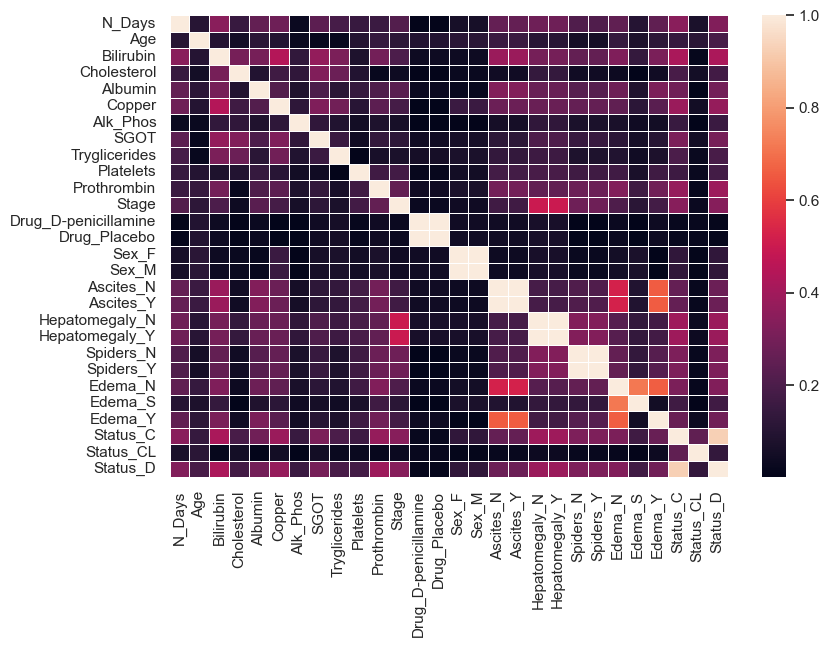

In [33]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(np.abs(df.corr()), annot=False, linewidths=.5, ax=ax)

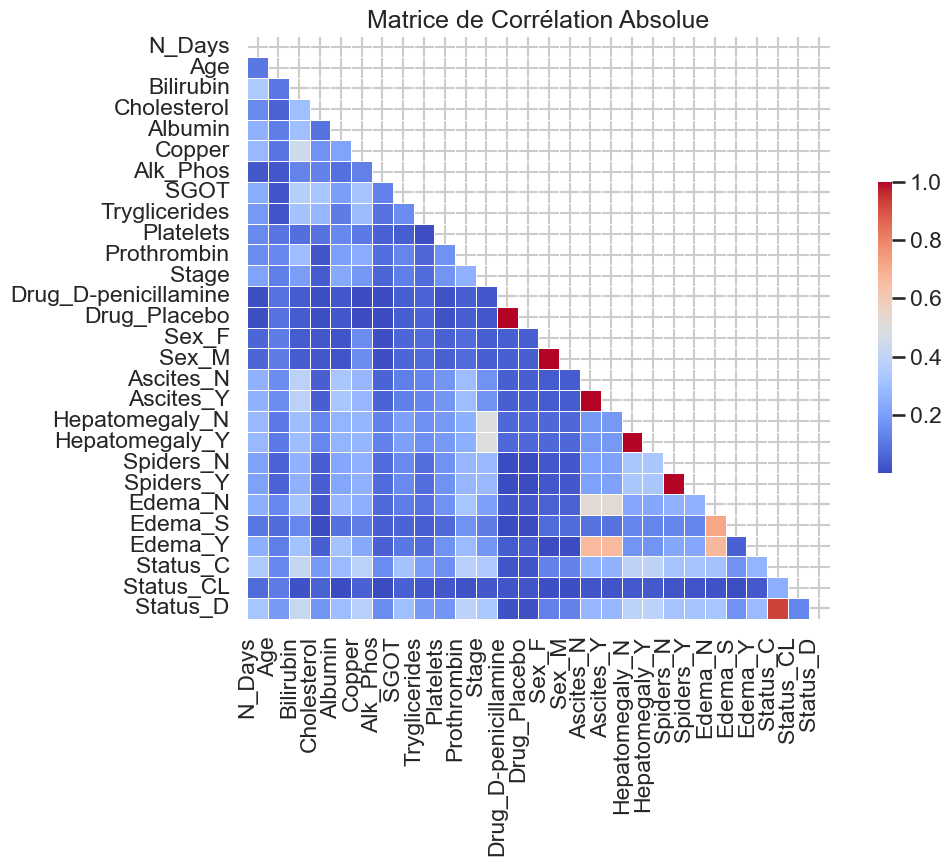

In [44]:
# Amélioration de la visualisation de la heatmap
sns.set_theme(context='talk', style='whitegrid')  # Le contexte 'talk' est mieux pour les grands graphiques

# Créer une figure plus grande pour une meilleure lisibilité
f, ax = plt.subplots(figsize=(12, 9))

# Générer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurer la heatmap
sns.heatmap(
    np.abs(df.corr()),  # Prendre la valeur absolue des corrélations
    annot=False,         # Ajouter des annotations avec les valeurs de corrélation
    linewidths=.5,      # Définir les largeurs des lignes entre les cellules
    ax=ax,              # Utiliser l'objet Axes créé
    mask=mask,          # Appliquer le masque sur le triangle supérieur
    cbar_kws={"shrink": .5},  # Réduire la barre de couleur
    square=True,        # Forcer les cellules à être carrées
    fmt=".2f",          # Formater les annotations avec 2 décimales
    cmap='coolwarm'     # Utiliser une carte de couleurs divergente
)

# Améliorer la mise en page pour accommoder les étiquettes et afficher le graphique
plt.title('Matrice de Corrélation Absolue')
plt.xticks(rotation=90, ha='right')  # Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.yticks(rotation=0)               # Garder les étiquettes de l'axe des y horizontales
plt.tight_layout()                   # Ajuster la mise en page pour tout faire tenir
plt.show()                           # Afficher la heatmap

> ### méthode avec le label encoder

In [45]:
df = pd.read_csv("train.csv",index_col=0)
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]= le.fit_transform(df[i])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.94242984, -1.01465513,  0.85844803, ..., -1.18904919,
        -0.0375219 ,  1.37572741],
       [ 0.4970246 ,  0.98555654,  0.23476028, ...,  0.47402401,
        -0.0375219 , -0.75560531],
       [ 1.27752879,  0.98555654, -1.26263383, ...,  1.36952496,
         1.11660504,  1.37572741],
       ...,
       [-0.41508685, -1.01465513,  2.03815544, ...,  2.64881203,
        -1.19164884,  1.37572741],
       [ 1.42010333, -1.01465513,  1.24652041, ..., -0.03769082,
         1.11660504,  1.37572741],
       [-0.04768324, -1.01465513,  0.23476028, ..., -0.42147694,
        -0.0375219 , -0.75560531]])

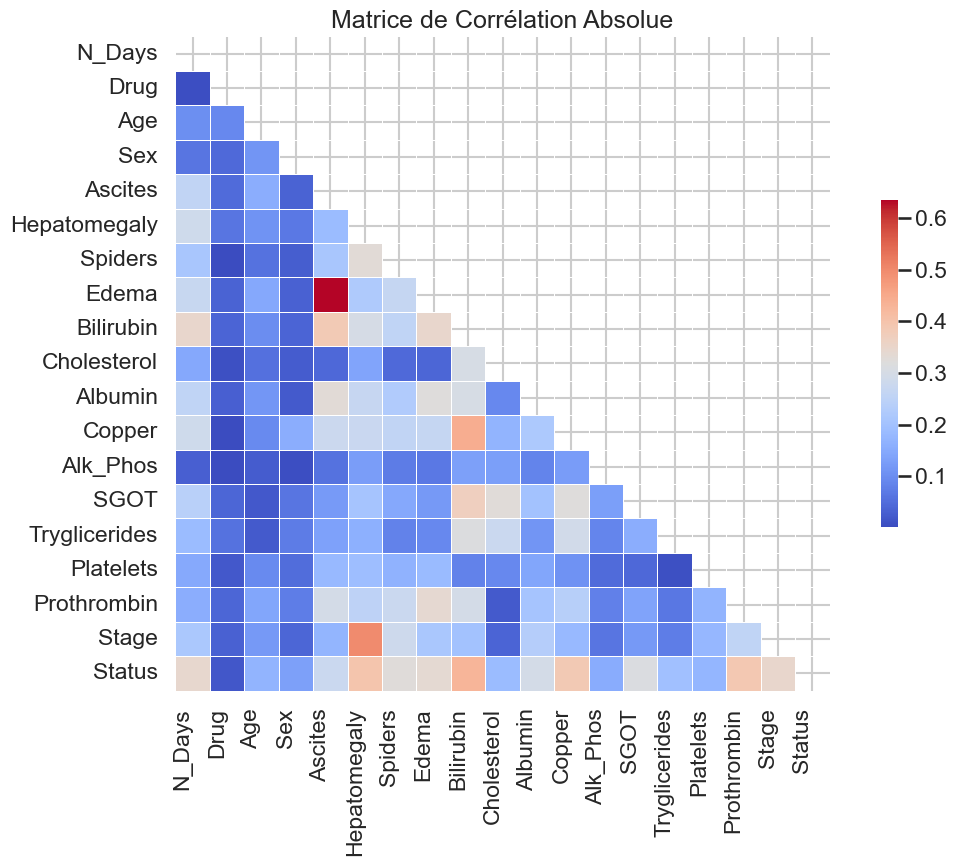

In [48]:
# Amélioration de la visualisation de la heatmap
sns.set_theme(context='talk', style='whitegrid')  # Le contexte 'talk' est mieux pour les grands graphiques

# Créer une figure plus grande pour une meilleure lisibilité
f, ax = plt.subplots(figsize=(12, 9))

# Générer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurer la heatmap
sns.heatmap(
    np.abs(df.corr()),  # Prendre la valeur absolue des corrélations
    annot=False,         # Ajouter des annotations avec les valeurs de corrélation
    linewidths=.5,      # Définir les largeurs des lignes entre les cellules
    ax=ax,              # Utiliser l'objet Axes créé
    mask=mask,          # Appliquer le masque sur le triangle supérieur
    cbar_kws={"shrink": .5},  # Réduire la barre de couleur
    square=True,        # Forcer les cellules à être carrées
    fmt=".2f",          # Formater les annotations avec 2 décimales
    cmap='coolwarm'     # Utiliser une carte de couleurs divergente
)

# Améliorer la mise en page pour accommoder les étiquettes et afficher le graphique
plt.title('Matrice de Corrélation Absolue')
plt.xticks(rotation=90, ha='right')  # Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.yticks(rotation=0)               # Garder les étiquettes de l'axe des y horizontales
plt.tight_layout()                   # Ajuster la mise en page pour tout faire tenir
plt.show()                           # Afficher la heatmap

In [49]:
np.abs(df.corr().Status).sort_values(ascending=False)[:10]

Status          1.000000
Bilirubin       0.429480
Hepatomegaly    0.396451
Prothrombin     0.388080
Copper          0.386015
Stage           0.346768
N_Days          0.343450
Edema           0.336720
Spiders         0.324339
SGOT            0.313242
Name: Status, dtype: float64